In [371]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sqlite3
import contextily as ctx
from matplotlib.colors import TwoSlopeNorm

In [42]:
archivo_gpkg = '../Data/taxi_zones/taxi_zone_NYC_join.gpkg'

In [43]:
gdf = gpd.read_file(archivo_gpkg, layer='taxi_zone_NYC')

In [ ]:
df = pd.read_csv('../Data/uber-nyc-forhire-vehicles-trip-data-2021/versions/1/dataframe_fhvhv_2021-05_with_cluster_labels.csv')
clusters = pd.read_csv('../Data/uber-nyc-forhire-vehicles-trip-data-2021/versions/1/clusters_kprototypes_simplified.csv')

In [6]:
df.groupby('cluster_labels').size()

cluster_labels
0    3198
1    6117
2     685
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

### Comparativa entre clusters:

In [250]:
df_cluster_0 = df.loc[df['cluster_labels'] == 0]
df_cluster_1 = df.loc[df['cluster_labels'] == 1]
df_cluster_2 = df.loc[df['cluster_labels'] == 2]

In [29]:
top_10_pulocation = {
    'Cluster 0': df_cluster_0.loc[:, 'PULocationID'].value_counts(normalize=True).head(10),
    'Cluster 1': df_cluster_1.loc[:, 'PULocationID'].value_counts(normalize=True).head(10),
    'Cluster 2': df_cluster_2.loc[:, 'PULocationID'].value_counts(normalize=True).head(10)
}

top_10_pulocation_df = pd.DataFrame(top_10_pulocation)
top_10_pulocation_df


Cluster 0  Cluster 1  Cluster 2
PULocationID                                 
7                   NaN   0.010953        NaN
17             0.011257        NaN        NaN
37             0.011570   0.010953        NaN
39                  NaN   0.011117        NaN
42                  NaN   0.013242        NaN
61             0.016886   0.018310        NaN
76                  NaN   0.015040   0.013139
79                  NaN   0.011770        NaN
89                  NaN   0.010299   0.016058
132            0.013446        NaN   0.070073
138            0.017198        NaN   0.033577
162                 NaN        NaN   0.014599
164                 NaN   0.010136        NaN
181            0.013446        NaN   0.017518
186                 NaN        NaN   0.013139
225            0.012195        NaN   0.016058
230                 NaN        NaN   0.017518
231            0.011570        NaN        NaN
237                 NaN        NaN   0.013139
244            0.011257        NaN        NaN
249                 NaN   0.010299        NaN
255            0.013446        NaN        NaN

In [30]:
shared_request_flag = {
    'Cluster 0': df_cluster_0.loc[:,'shared_request_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'shared_request_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'shared_request_flag'].value_counts(normalize=True)
}

shared_request_flag_df = pd.DataFrame(shared_request_flag)
shared_request_flag_df

Cluster 0  Cluster 1  Cluster 2
shared_request_flag                                 
N                     0.999687   0.999346    0.99854
Y                     0.000313   0.000654    0.00146

In [33]:
shared_match_flag = {
    'Cluster 0': df_cluster_0.loc[:,'shared_match_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'shared_match_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'shared_match_flag'].value_counts(normalize=True)
}

shared_match_flag_df = pd.DataFrame(shared_match_flag)
shared_match_flag_df

Cluster 0  Cluster 1  Cluster 2
shared_match_flag                                 
N                        1.0    0.99951        1.0
Y                        NaN    0.00049        NaN

In [34]:
access_a_ride_flag = {
    'Cluster 0': df_cluster_0.loc[:,'access_a_ride_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'access_a_ride_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'access_a_ride_flag'].value_counts(normalize=True)
}

access_a_ride_flag_df = pd.DataFrame(access_a_ride_flag)
access_a_ride_flag_df

Cluster 0  Cluster 1  Cluster 2
access_a_ride_flag                                 
                     0.711069   0.747752   0.683212
N                    0.288931   0.252248   0.316788

In [35]:
wav_request_flag = {
    'Cluster 0': df_cluster_0.loc[:,'wav_request_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'wav_request_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'wav_request_flag'].value_counts(normalize=True)
}

wav_request_flag_df = pd.DataFrame(wav_request_flag)
wav_request_flag_df

Cluster 0  Cluster 1  Cluster 2
wav_request_flag                                 
N                  0.997498   0.998365    0.99854
Y                  0.002502   0.001635    0.00146

In [36]:
wav_match_flag = {
    'Cluster 0': df_cluster_0.loc[:,'wav_match_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'wav_match_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'wav_match_flag'].value_counts(normalize=True)
}

wav_match_flag_df = pd.DataFrame(wav_match_flag)
wav_match_flag_df

Cluster 0  Cluster 1  Cluster 2
wav_match_flag                                 
N                0.953096   0.937224   0.969343
Y                0.046904   0.062776   0.030657

In [8]:
pickup_datetime_dayofweek = {
    'Cluster 0': df_cluster_0.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True)
}
pickup_datetime_dayofweek_df = pd.DataFrame(pickup_datetime_dayofweek)
pickup_datetime_dayofweek_df.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)

/home/gonzalopc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.


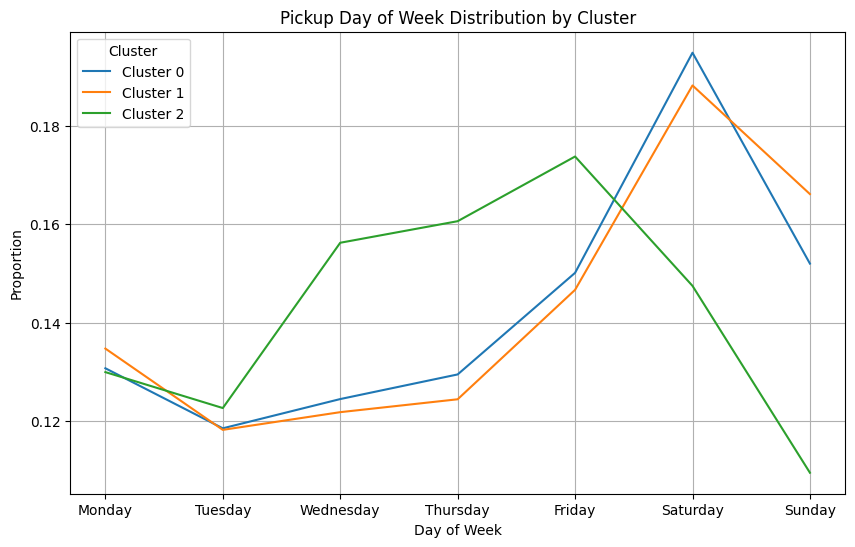

In [9]:
import matplotlib.pyplot as plt

pickup_datetime_dayofweek_df_reset = pickup_datetime_dayofweek_df.reset_index().rename(columns={'index': 'Day'})

# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        pickup_datetime_dayofweek_df_reset['pickup_datetime_dayofweek'],
        pickup_datetime_dayofweek_df_reset[cluster],
        label=cluster
    )

# Add labels, title, and legend
plt.title('Pickup Day of Week Distribution by Cluster')
plt.xlabel('Day of Week')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [14]:
pickup_datetime_hour = {
    'Cluster 0': df_cluster_0.loc[:,'pickup_datetime_hour'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'pickup_datetime_hour'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'pickup_datetime_hour'].value_counts(normalize=True)
}

pickup_datetime_hour_df = pd.DataFrame(pickup_datetime_hour)

In [223]:
dropoff_datetime_hour = {
    'Cluster 0': df_cluster_0.loc[:,'dropoff_datetime_hour'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'dropoff_datetime_hour'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'dropoff_datetime_hour'].value_counts(normalize=True)
}

dropoff_datetime_hour_df = pd.DataFrame(dropoff_datetime_hour)

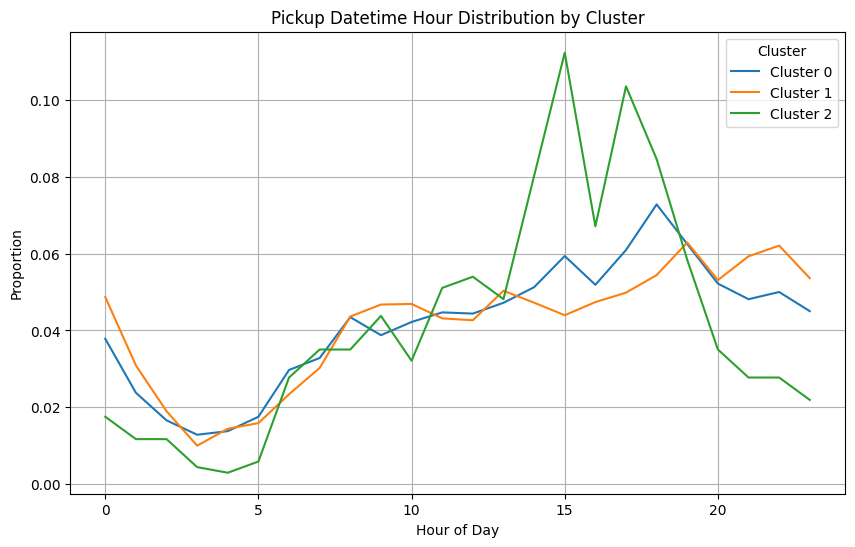

In [17]:
from plotnine import ggplot, aes, geom_line, labs

pickup_datetime_hour_df_reset = pickup_datetime_hour_df.reset_index().rename(columns={'index': 'Hour'})

# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        pickup_datetime_hour_df_reset['pickup_datetime_hour'],
        pickup_datetime_hour_df_reset[cluster],
        label=cluster
    )

# Add labels, title, and legend
plt.title('Pickup Datetime Hour Distribution by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


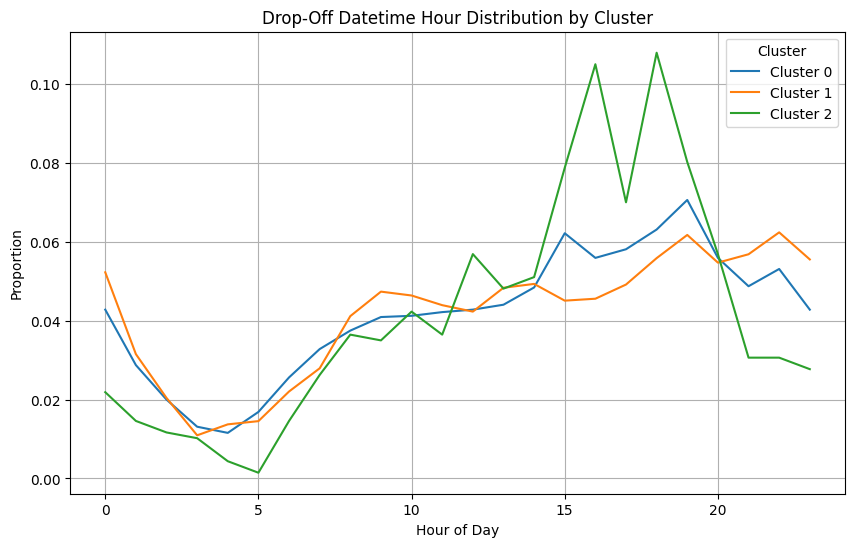

In [226]:
dropoff_datetime_hour_df_reset = dropoff_datetime_hour_df.reset_index().rename(columns={'index': 'Hour'})

# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        dropoff_datetime_hour_df_reset['dropoff_datetime_hour'],
        dropoff_datetime_hour_df_reset[cluster],
        label=cluster
    )

# Add labels, title, and legend
plt.title('Drop-Off Datetime Hour Distribution by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Análisis cluster 0

In [10]:
clusters.iloc[0]

trip_miles                       7.199341
trip_time                     1522.070669
tolls                            1.511307
congestion_surcharge             1.192699
airport_fee                      0.208724
driver_pay                      24.303305
PULocationID                          138
DOLocationID                          265
shared_request_flag                     N
shared_match_flag                       N
access_a_ride_flag                       
wav_request_flag                        N
wav_match_flag                          N
pickup_datetime_dayofweek               5
dropoff_datetime_dayofweek              5
pickup_datetime_hour                   18
dropoff_datetime_hour                  19
Name: 0, dtype: object

In [27]:
df_cluster_0.loc[:,'PULocationID'].value_counts(normalize=True).head(10)

PULocationID
138    0.017198
61     0.016886
181    0.013446
255    0.013446
132    0.013446
225    0.012195
231    0.011570
37     0.011570
244    0.011257
17     0.011257
Name: proportion, dtype: float64

In [16]:
df_cluster_0.loc[:,'DOLocationID'].value_counts(normalize=True).head(10)

DOLocationID
265    0.044715
138    0.023765
132    0.022201
61     0.018449
37     0.015635
181    0.011882
75     0.011882
255    0.011570
244    0.011257
112    0.011257
Name: proportion, dtype: float64

### Manejo de GeoJson y GeoPandas

In [34]:
df = df.merge(gdf[['LocationID', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'borough': 'PUBorough'}, inplace=True)
df.drop(columns=['LocationID'], inplace=True)

df = df.merge(gdf[['LocationID', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'borough': 'DOBorough'}, inplace=True)
df.drop(columns=['LocationID'], inplace=True)

- Generar mapa con mapa base OSM + mapa sin join numerado
- Clasificar por cluster: ver por LocationID y por borough

In [72]:
# Conectar al archivo GPKG
conn = sqlite3.connect(archivo_gpkg)

# Ver las capas disponibles
layers = pd.read_sql("SELECT table_name FROM gpkg_contents", conn)

In [73]:
# Consulta SQL a una capa
query = """
SELECT *
FROM taxi_zone_NYC_basemap
"""
df_sql3 = pd.read_sql(query, conn)

conn.close()

In [75]:
base_map = gpd.read_file(archivo_gpkg, layer='taxi_zone_NYC_basemap')
query_map = base_map[base_map['borough'].isin(['MANHATTAN'])]

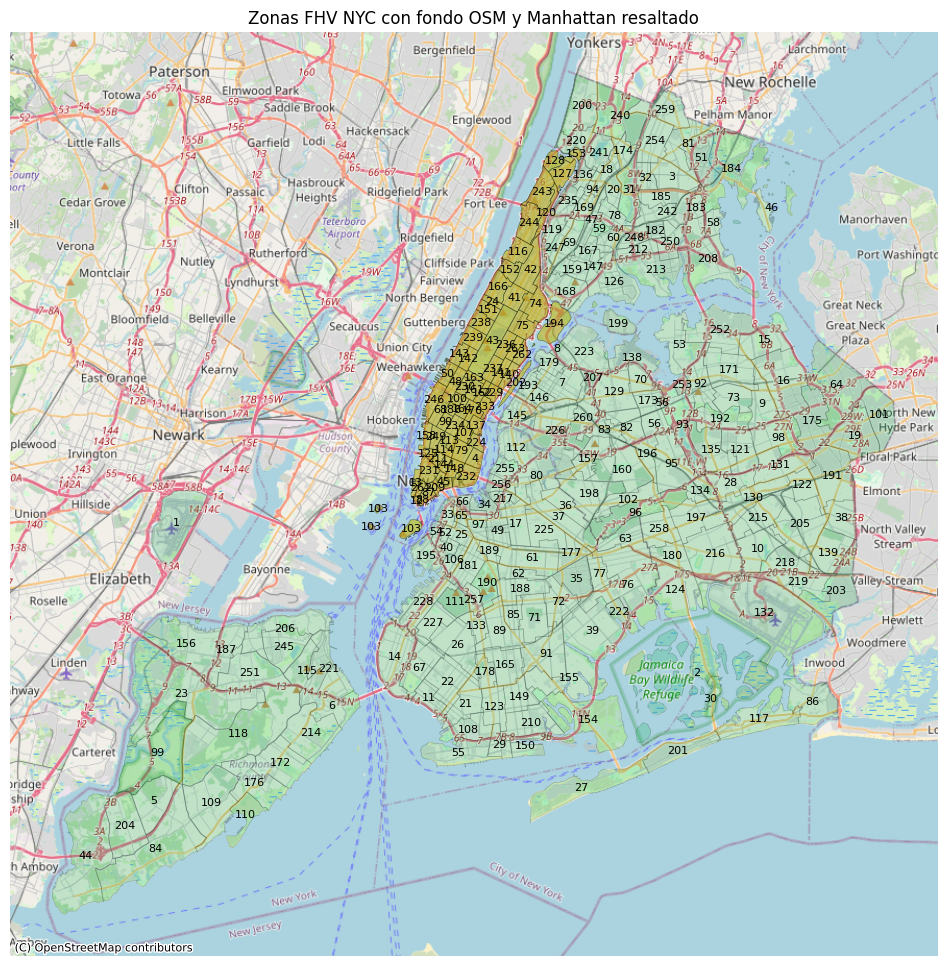

In [86]:
# Reproyectar a EPSG:3857 (Web Mercator, usado por OSM)
base_3857 = base_map.to_crs(epsg=3857)
query_3857 = query_map = base_map[base_map['borough'].isin(['Manhattan'])].to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(12, 12))

# Capa filtrada (resaltada)
query_3857.plot(ax=ax, color='orange', edgecolor='black', linewidth=0.25, alpha=0.5)

# Capa base (gris claro)
base_3857.plot(ax=ax, color='#03af46', edgecolor='k', linewidth=0.5, alpha=0.2)

for idx, row in base_3857.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x, centroid.y,
        str(row["LocationID"]),
        fontsize=8,
        ha='center',
        va='center',
        color='k'
    )

# Añadir mapa base OSM
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Estética
ax.set_axis_off()
plt.title("Zonas FHV NYC con fondo OSM y Manhattan resaltado")
plt.show()

Mapa para cluster 0:
- DOLocation y PULocation counts
- Borough counts

In [197]:
df[['PUBorough', 'DOBorough']] = df[['PUBorough', 'DOBorough']].fillna('Out of City')

In [251]:
cluster_0_df = df.loc[df['cluster_labels'] == 0]
cluster_1_df = df.loc[df['cluster_labels'] == 1]
cluster_2_df = df.loc[df['cluster_labels'] == 2]

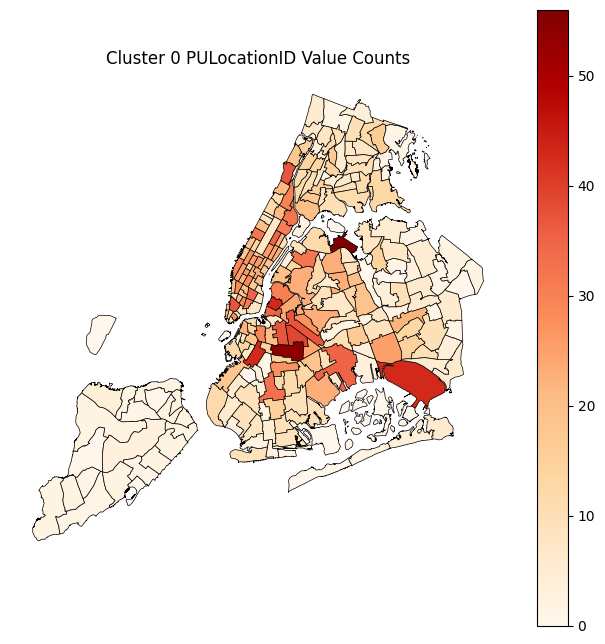

In [252]:
# Aggregate PULocationID value counts
pulocation_counts = cluster_0_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 0 PULocationID Value Counts")
ax.set_axis_off()
plt.show()

In [206]:
cluster_0_counts = cluster_0_df[['PULocationID', 'PUBorough']].groupby(['PULocationID', 'PUBorough']).size().reset_index(name='Counts')
cluster_0_counts = cluster_0_counts.merge(base_map[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
cluster_0_counts.drop(columns=['LocationID'], inplace=True)
cluster_0_counts['Pct_Counts'] = (round(cluster_0_counts['Counts'] / cluster_0_counts['Counts'].sum(),4)) * 100
cluster_0_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)


PULocationID  PUBorough  Counts                       zone  Pct_Counts
0           138     Queens      56          LaGuardia Airport        1.73
1            61   Brooklyn      54        Crown Heights North        1.67
2           132     Queens      43                JFK Airport        1.33
3           181   Brooklyn      43                 Park Slope        1.33
4           255   Brooklyn      43  Williamsburg (North Side)        1.33
5           225   Brooklyn      39         Stuyvesant Heights        1.21
6           231  Manhattan      37       TriBeCa/Civic Center        1.14
7            37   Brooklyn      37             Bushwick South        1.14
8            17   Brooklyn      37                    Bedford        1.14
9           244  Manhattan      37   Washington Heights South        1.14

In [207]:
cluster_0_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

PUBorough  Counts  Pct_Counts
2      Manhattan    1233       38.15
1       Brooklyn     944       29.17
4         Queens     661       20.42
0          Bronx     366       11.33
5  Staten Island      31        0.93
3    Out of City       1        0.03

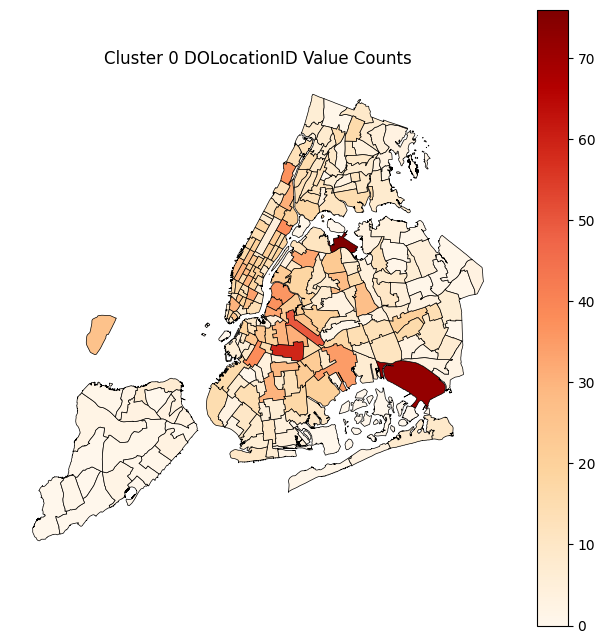

In [208]:
# Aggregate DOLocationID value counts
dolocation_counts = cluster_0_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 0 DOLocationID Value Counts")
ax.set_axis_off()
plt.show()

In [209]:
cluster_0_do_counts = cluster_0_df[['DOLocationID', 'DOBorough']].groupby(['DOLocationID', 'DOBorough']).size().reset_index(name='Counts')
cluster_0_do_counts = cluster_0_do_counts.merge(base_map[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
cluster_0_do_counts.drop(columns=['LocationID'], inplace=True)
cluster_0_do_counts['Pct_Counts'] = (round(cluster_0_do_counts['Counts'] / cluster_0_do_counts['Counts'].sum(),4)) * 100
cluster_0_do_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

DOLocationID    DOBorough  Counts                       zone  Pct_Counts
0           265  Out of City     144                        NaN        4.46
1           138       Queens      76          LaGuardia Airport        2.35
2           132       Queens      72                JFK Airport        2.23
3            61     Brooklyn      59        Crown Heights North        1.83
4            37     Brooklyn      50             Bushwick South        1.55
5            75    Manhattan      38          East Harlem South        1.18
6           181     Brooklyn      38                 Park Slope        1.18
7           244    Manhattan      37   Washington Heights South        1.14
8           255     Brooklyn      37  Williamsburg (North Side)        1.14
9           112     Brooklyn      36                 Greenpoint        1.11

In [210]:
cluster_0_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

DOBorough  Counts  Pct_Counts
3      Manhattan    1084       33.55
1       Brooklyn     924       28.58
5         Queens     680       21.05
0          Bronx     344       10.65
4    Out of City     144        4.46
6  Staten Island      30        0.91
2            EWR      26        0.80

Cluster 1:

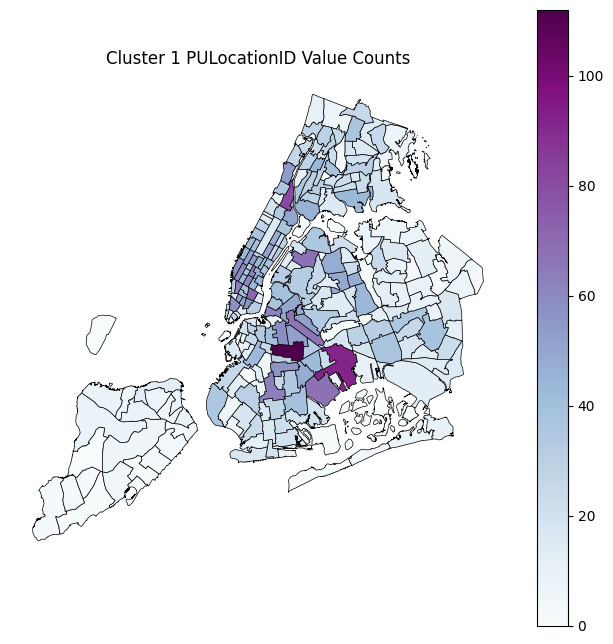

In [211]:
# Aggregate PULocationID value counts
pulocation_counts = cluster_1_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='BuPu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 1 PULocationID Value Counts")
ax.set_axis_off()
plt.show()

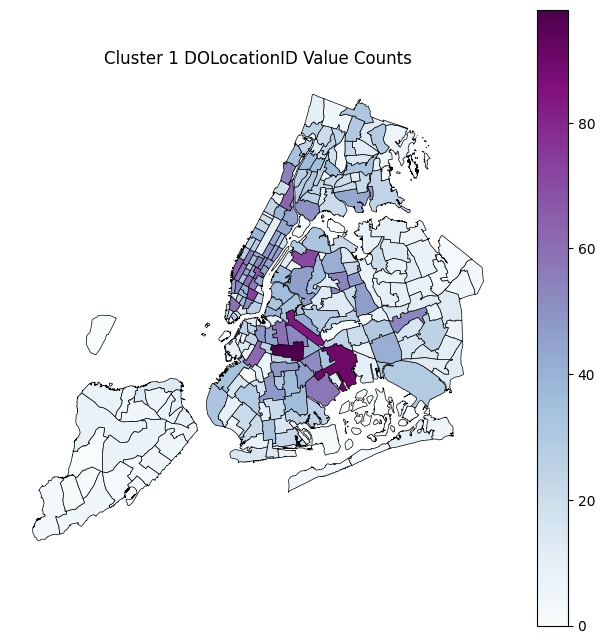

In [212]:
# Aggregate DOLocationID value counts
dolocation_counts = cluster_1_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='BuPu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 1 DOLocationID Value Counts")
ax.set_axis_off()
plt.show()

In [213]:
cluster_1_counts = cluster_1_df[['PULocationID', 'PUBorough']].groupby(['PULocationID', 'PUBorough']).size().reset_index(name='Counts')
cluster_1_counts = cluster_1_counts.merge(base_map[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
cluster_1_counts.drop(columns=['LocationID'], inplace=True)
cluster_1_counts['Pct_Counts'] = (round(cluster_1_counts['Counts'] / cluster_1_counts['Counts'].sum(),4)) * 100
cluster_1_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

PULocationID  PUBorough  Counts                       zone  Pct_Counts
0            61   Brooklyn     112        Crown Heights North        1.80
1            76   Brooklyn      92              East New York        1.48
2            42  Manhattan      81       Central Harlem North        1.30
3            79  Manhattan      72               East Village        1.16
4             7     Queens      68                    Astoria        1.09
5            39   Brooklyn      68                   Canarsie        1.09
6            37   Brooklyn      67             Bushwick South        1.08
7           249  Manhattan      63               West Village        1.01
8            89   Brooklyn      63       Flatbush/Ditmas Park        1.01
9           256   Brooklyn      62  Williamsburg (South Side)        1.00

In [214]:
cluster_1_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

PUBorough  Counts  Pct_Counts
2      Manhattan    2229       35.89
1       Brooklyn    1765       28.40
4         Queens    1217       19.59
0          Bronx     906       14.58
5  Staten Island      92        1.49
3    Out of City       2        0.03

In [215]:
cluster_1_do_counts = cluster_1_df[['DOLocationID', 'DOBorough']].groupby(['DOLocationID', 'DOBorough']).size().reset_index(name='Counts')
cluster_1_do_counts = cluster_1_do_counts.merge(base_map[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
cluster_1_do_counts.drop(columns=['LocationID'], inplace=True)
cluster_1_do_counts['Pct_Counts'] = (round(cluster_1_do_counts['Counts'] / cluster_1_do_counts['Counts'].sum(),4)) * 100
cluster_1_do_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

DOLocationID    DOBorough  Counts                       zone  Pct_Counts
0            61     Brooklyn      98        Crown Heights North        1.58
1            76     Brooklyn      90              East New York        1.45
2           265  Out of City      87                        NaN        1.40
3            37     Brooklyn      84             Bushwick South        1.35
4            79    Manhattan      74               East Village        1.19
5             7       Queens      71                    Astoria        1.14
6           170    Manhattan      66                Murray Hill        1.06
7           246    Manhattan      65  West Chelsea/Hudson Yards        1.05
8            42    Manhattan      63       Central Harlem North        1.01
9           181     Brooklyn      62                 Park Slope        1.00

In [216]:
cluster_1_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

DOBorough  Counts  Pct_Counts
2      Manhattan    2201       35.41
1       Brooklyn    1743       28.08
4         Queens    1199       19.29
0          Bronx     883       14.21
5  Staten Island      93        1.48
3    Out of City      92        1.48

Cluster 2:

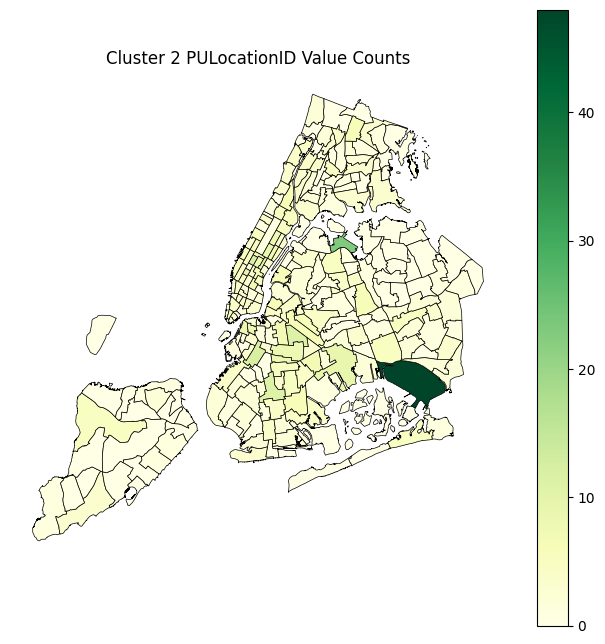

In [117]:
# Aggregate PULocationID value counts
pulocation_counts = cluster_2_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='YlGn',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 2 PULocationID Value Counts")
ax.set_axis_off()
plt.show()

In [217]:
cluster_2_counts = cluster_2_df[['PULocationID', 'PUBorough']].groupby(['PULocationID', 'PUBorough']).size().reset_index(name='Counts')
cluster_2_counts = cluster_2_counts.merge(base_map[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
cluster_2_counts.drop(columns=['LocationID'], inplace=True)
cluster_2_counts['Pct_Counts'] = (round(cluster_2_counts['Counts'] / cluster_2_counts['Counts'].sum(),4)) * 100
cluster_2_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

PULocationID  PUBorough  Counts                          zone  Pct_Counts
0           132     Queens      48                   JFK Airport        6.95
1           138     Queens      23             LaGuardia Airport        3.33
2           181   Brooklyn      12                    Park Slope        1.74
3           230  Manhattan      12     Times Sq/Theatre District        1.74
4            89   Brooklyn      11          Flatbush/Ditmas Park        1.59
5           225   Brooklyn      11            Stuyvesant Heights        1.59
6           162  Manhattan      10                  Midtown East        1.45
7           186  Manhattan       9  Penn Station/Madison Sq West        1.30
8            76   Brooklyn       9                 East New York        1.30
9           237  Manhattan       9         Upper East Side South        1.30

In [218]:
cluster_2_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

PUBorough  Counts  Pct_Counts
2      Manhattan     238       34.36
1       Brooklyn     205       29.61
4         Queens     163       23.51
0          Bronx      70       10.05
5  Staten Island      14        2.00
3    Out of City       1        0.14

In [219]:
cluster_2_do_counts = cluster_2_df[['DOLocationID', 'DOBorough']].groupby(['DOLocationID', 'DOBorough']).size().reset_index(name='Counts')
cluster_2_do_counts = cluster_2_do_counts.merge(base_map[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
cluster_2_do_counts.drop(columns=['LocationID'], inplace=True)
cluster_2_do_counts['Pct_Counts'] = (round(cluster_2_do_counts['Counts'] / cluster_2_do_counts['Counts'].sum(),4)) * 100
cluster_2_do_counts.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

DOLocationID    DOBorough  Counts                 zone  Pct_Counts
0           265  Out of City     149                  NaN       21.69
1           132       Queens      57          JFK Airport        8.30
2             1          EWR      17       Newark Airport        2.47
3           138       Queens       8    LaGuardia Airport        1.16
4           140    Manhattan       8      Lenox Hill East        1.16
5            61     Brooklyn       7  Crown Heights North        1.02
6            17     Brooklyn       7              Bedford        1.02
7           170    Manhattan       6          Murray Hill        0.87
8            76     Brooklyn       6        East New York        0.87
9            48    Manhattan       6         Clinton East        0.87

In [220]:
cluster_2_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)

DOBorough  Counts  Pct_Counts
3      Manhattan     161       23.44
1       Brooklyn     160       23.33
4    Out of City     149       21.69
5         Queens     144       21.02
0          Bronx      44        6.47
2            EWR      17        2.47
6  Staten Island      12        1.78

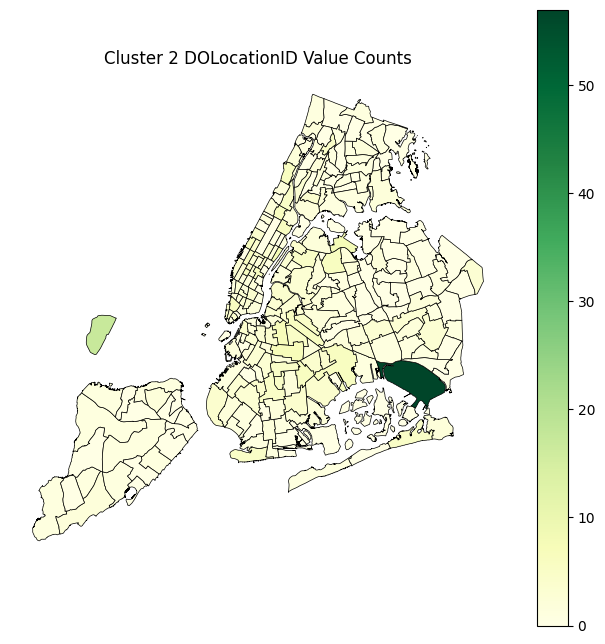

In [118]:
# Aggregate PULocationID value counts
dolocation_counts = cluster_2_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_counts['Counts'] = base_map_with_counts['Counts'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='Counts',
    cmap='YlGn',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 2 DOLocationID Value Counts")
ax.set_axis_off()
plt.show()

Estudiar trayectos

In [229]:
cluster_0_trips = cluster_0_df[['PULocationID','DOLocationID','PUBorough','DOBorough']].groupby(['PULocationID','DOLocationID']).size().reset_index(name='Counts')
cluster_0_trips['Pct_Counts'] = (round(cluster_0_trips['Counts'] / cluster_0_trips['Counts'].sum(),4)) * 100
cluster_0_trips.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

PULocationID  DOLocationID  Counts  Pct_Counts
0            76            72       7        0.22
1           246           265       5        0.16
2            76            61       5        0.16
3           263           265       4        0.12
4            61           112       4        0.12
5            61            91       4        0.12
6           239           265       4        0.12
7            56           129       4        0.12
8           167           265       4        0.12
9           237            79       4        0.12

In [230]:
cluster_1_trips = cluster_1_df[['PULocationID','DOLocationID','PUBorough','DOBorough']].groupby(['PULocationID','DOLocationID']).size().reset_index(name='Counts')
cluster_1_trips['Pct_Counts'] = (round(cluster_1_trips['Counts'] / cluster_1_trips['Counts'].sum(),4)) * 100
cluster_1_trips.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

PULocationID  DOLocationID  Counts  Pct_Counts
0            76            76      38        0.62
1            39            39      21        0.34
2            61            61      16        0.26
3            42            42      14        0.23
4            37            37      13        0.21
5            56            82      12        0.19
6            61            37      11        0.18
7            14            14      11        0.18
8            26            26      11        0.18
9            39            76      10        0.16

In [231]:
cluster_2_trips = cluster_2_df[['PULocationID','DOLocationID','PUBorough','DOBorough']].groupby(['PULocationID','DOLocationID']).size().reset_index(name='Counts')
cluster_2_trips['Pct_Counts'] = (round(cluster_2_trips['Counts'] / cluster_2_trips['Counts'].sum(),4)) * 100
cluster_2_trips.sort_values(by='Counts', ascending=False).head(10).reset_index(drop=True)

PULocationID  DOLocationID  Counts  Pct_Counts
0           138           265      10        1.46
1           132           265      10        1.46
2           107           265       5        0.73
3           162           265       5        0.73
4           170           265       5        0.73
5           181           265       4        0.58
6           230           265       4        0.58
7           186           265       4        0.58
8            34           265       3        0.44
9           262           265       3        0.44

#### Estudio de densidades
Calcular 'Counts'/Area del polígono

In [289]:
pulocation_counts = cluster_0_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

In [290]:
# Merge pulocation_counts with base_map to get the Shape_Area
pulocation_counts = pulocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
pulocation_counts['cab_density'] = pulocation_counts['Counts'] / pulocation_counts['Shape_Area']

In [291]:
pulocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         186      26    0.370729    70.132015
1         144      29    0.474790    61.079674
2         211      21    0.397292    52.857848
3         163      19    0.408568    46.503910
4         230      25    0.560914    44.570073
5         148      31    0.697490    44.445088
6          87      28    0.672050    41.663554
7         164      23    0.556318    41.343246
8          90      22    0.553133    39.773472
9         162      19    0.478937    39.671188

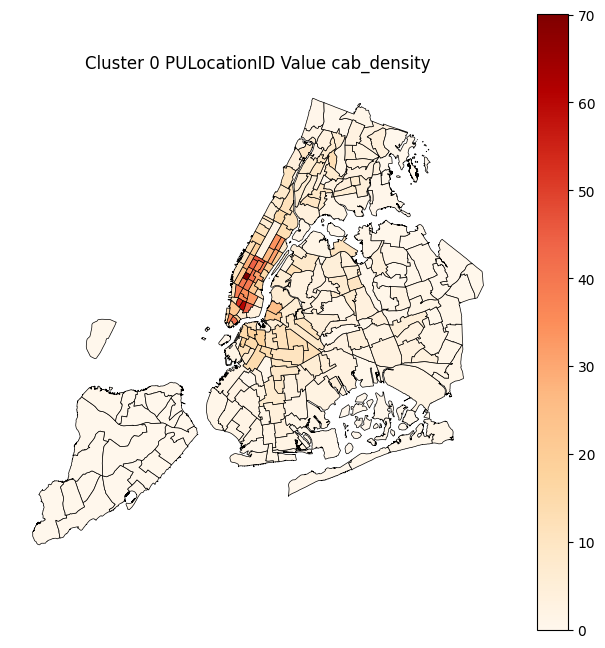

In [292]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 0 PULocationID Value cab_density")
ax.set_axis_off()
plt.show()

In [293]:
# Aggregate DOLocationID value counts
dolocation_counts = cluster_0_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge pulocation_counts with base_map to get the Shape_Area
dolocation_counts = dolocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
dolocation_counts['cab_density'] = dolocation_counts['Counts'] / dolocation_counts['Shape_Area']

In [294]:
dolocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         186      28    0.370729    75.526786
1         211      25    0.397292    62.926009
2         100      20    0.374700    53.376006
3         261      17    0.343423    49.501606
4         234      30    0.731054    41.036618
5         230      23    0.560914    41.004467
6         144      19    0.474790    40.017717
7         162      18    0.478937    37.583231
8          87      25    0.672050    37.199602
9         164      20    0.556318    35.950648

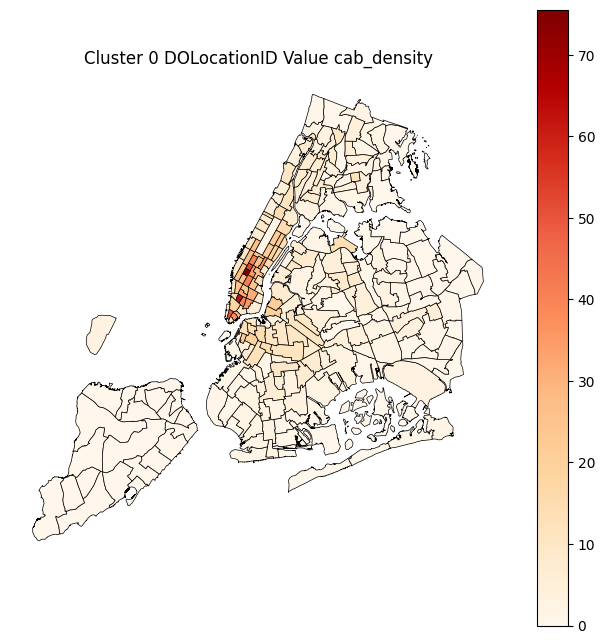

In [295]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 0 DOLocationID Value cab_density")
ax.set_axis_off()
plt.show()

In [296]:
# Aggregate DOLocationID value counts
pulocation_counts = cluster_1_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

# Merge pulocation_counts with base_map to get the Shape_Area
pulocation_counts = pulocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
pulocation_counts['cab_density'] = pulocation_counts['Counts'] / pulocation_counts['Shape_Area']

In [297]:
pulocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         211      52    0.397292   130.886099
1         164      62    0.556318   111.447010
2         144      51    0.474790   107.415978
3         186      38    0.370729   102.500638
4         230      54    0.560914    96.271357
5         100      34    0.374700    90.739210
6         249      63    0.722156    87.238768
7         114      40    0.470208    85.068790
8         234      61    0.731054    83.441123
9         148      56    0.697490    80.287901

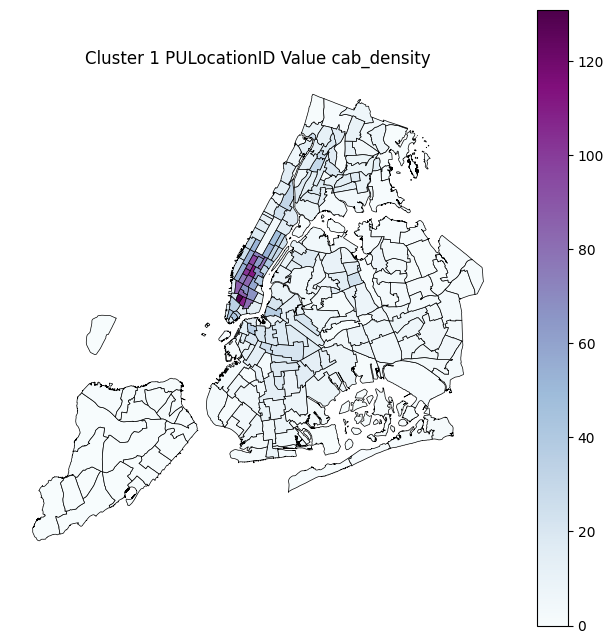

In [298]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='BuPu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 1 PULocationID Value cab_density")
ax.set_axis_off()
plt.show()

In [299]:
# Aggregate DOLocationID value counts
dolocation_counts = cluster_1_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge pulocation_counts with base_map to get the Shape_Area
dolocation_counts = dolocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
dolocation_counts['cab_density'] = dolocation_counts['Counts'] / dolocation_counts['Shape_Area']

In [300]:
dolocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         186      45    0.370729   121.382334
1         162      52    0.478937   108.573779
2         163      40    0.408568    97.902967
3         170      66    0.743151    88.811058
4         234      62    0.731054    84.809010
5         144      38    0.474790    80.035435
6         100      29    0.374700    77.395208
7         164      43    0.556318    77.293894
8         114      36    0.470208    76.561911
9         107      57    0.746112    76.396017

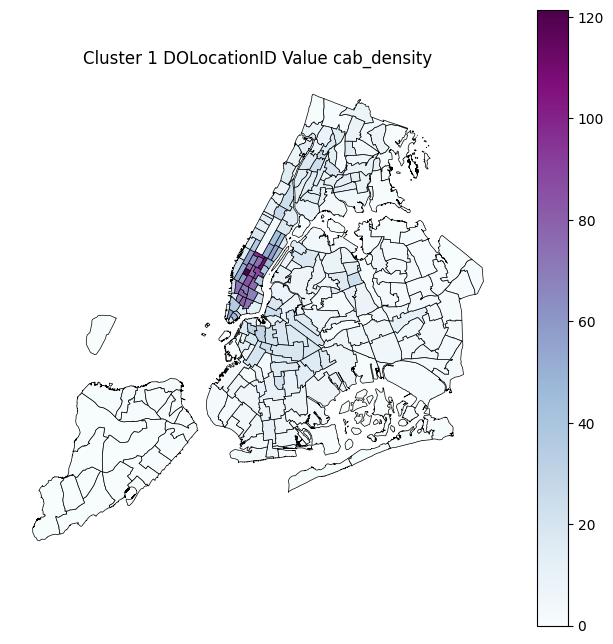

In [301]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='BuPu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 1 DOLocationID Value cab_density")
ax.set_axis_off()
plt.show()

In [308]:
# Aggregate DOLocationID value counts
pulocation_counts = cluster_2_df['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['LocationID', 'Counts']

# Merge pulocation_counts with base_map to get the Shape_Area
pulocation_counts = pulocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
pulocation_counts['cab_density'] = pulocation_counts['Counts'] / pulocation_counts['Shape_Area']

In [309]:
pulocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         186       9    0.370729    24.276467
1         230      12    0.560914    21.393635
2         162      10    0.478937    20.879573
3         163       7    0.408568    17.133019
4         261       5    0.343423    14.559296
5         161       8    0.719131    11.124542
6         211       4    0.397292    10.068161
7          65       8    0.818039     9.779487
8         107       7    0.746112     9.381967
9         237       9    0.959873     9.376238

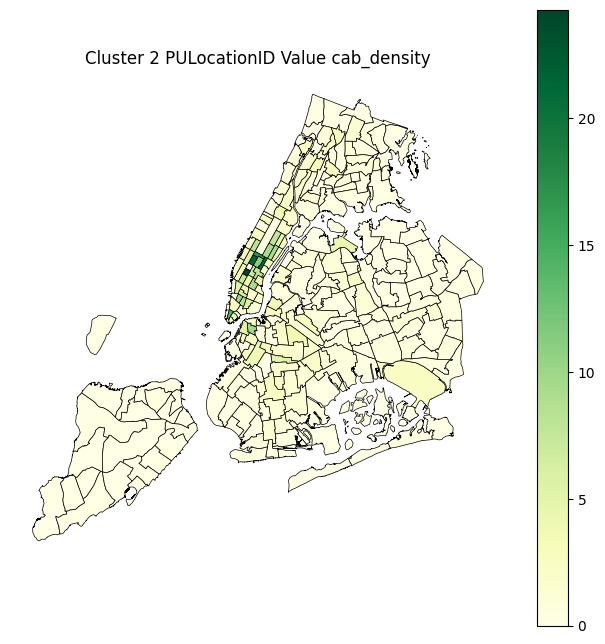

In [310]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(pulocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='YlGn',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 2 PULocationID Value cab_density")
ax.set_axis_off()
plt.show()

In [311]:
# Aggregate DOLocationID value counts
dolocation_counts = cluster_2_df['DOLocationID'].value_counts().reset_index()
dolocation_counts.columns = ['LocationID', 'Counts']

# Merge pulocation_counts with base_map to get the Shape_Area
dolocation_counts = dolocation_counts.merge(
    base_map.groupby('LocationID')['Shape_Area'].sum().reset_index().assign(Shape_Area=lambda x: x['Shape_Area'] * 10000),
    on='LocationID',
    how='left'
)

# Calculate cab_density
dolocation_counts['cab_density'] = dolocation_counts['Counts'] / dolocation_counts['Shape_Area']

In [312]:
dolocation_counts.sort_values(by='cab_density', ascending=False).head(10).reset_index(drop=True)

LocationID  Counts  Shape_Area  cab_density
0         186       6    0.370729    16.184311
1         100       5    0.374700    13.344001
2         261       4    0.343423    11.647437
3         163       4    0.408568     9.790297
4         162       4    0.478937     8.351829
5         170       6    0.743151     8.073733
6         140       8    1.142039     7.005014
7         114       3    0.470208     6.380159
8          48       6    0.942538     6.365788
9         144       3    0.474790     6.318587

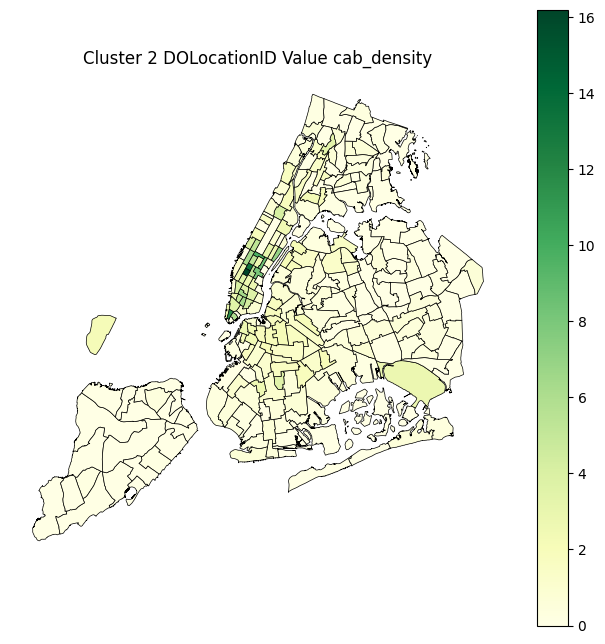

In [313]:
# Aggregate PULocationID value counts
#pulocation_counts.columns = ['LocationID', 'cab_density']

# Merge with base_map to associate counts with geometries
base_map_with_density = base_map.merge(dolocation_counts, on='LocationID', how='left')
base_map_with_density['cab_density'] = base_map_with_density['cab_density'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_density.plot(
    column='cab_density',
    cmap='YlGn',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add title and aesthetics
plt.title("Cluster 2 DOLocationID Value cab_density")
ax.set_axis_off()
plt.show()

#### Comparativa respecto de la media
- Respecto a tanto por ciento (%) de counts
- Respecto a la densidad de vehiculos/milla cuadrada

In [321]:
# Aggregate PULocationID value counts
pickup_total_counts = df['PULocationID'].value_counts().reset_index()
pickup_total_counts.columns = ['LocationID', 'Counts']
pickup_total_counts['Pct_Counts'] = (round(pickup_total_counts['Counts'] / pickup_total_counts['Counts'].sum(),4)) * 100

dropoff_total_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_total_counts.columns = ['LocationID', 'Counts']
dropoff_total_counts['Pct_Counts'] = (round(dropoff_total_counts['Counts'] / dropoff_total_counts['Counts'].sum(),4)) * 100

Cluster 0

In [ ]:
cluster_0_counts['diff_pct'] = cluster_0_counts['Pct_Counts'] - pickup_total_counts['Pct_Counts']

In [342]:
pulocation_diff_pct.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
pulocation_diff_pct.drop('index', axis=1, inplace=True)

In [343]:
pulocation_diff_pct

LocationID  diff_pct
0             3     -1.48
1             4     -1.13
2             5     -1.13
3             6     -1.06
4             7     -0.09
..          ...       ...
240         260      0.34
241         261      0.34
242         262      0.28
243         263      0.65
244         265      0.01

[245 rows x 2 columns]

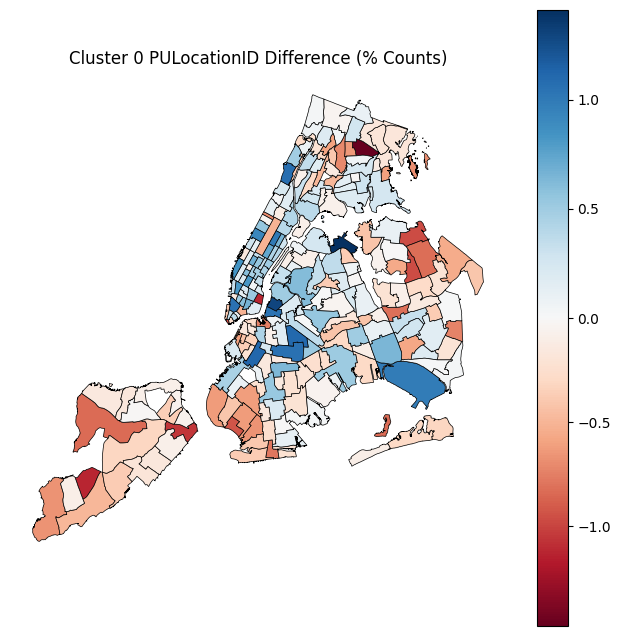

In [372]:
# Aggregate PULocationID value counts

# Merge with base_map to associate counts with geometries
base_map_with_counts = base_map.merge(pulocation_diff_pct, on='LocationID', how='left')

norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 0 PULocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

In [361]:
cluster_0_do_counts['diff_pct_do'] = cluster_0_do_counts['Pct_Counts'] - dropoff_total_counts['Pct_Counts']
dolocation_diff_pct = cluster_0_do_counts[['DOLocationID','zone','diff_pct_do']].reset_index()

dolocation_diff_pct.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
dolocation_diff_pct.drop('index', axis=1, inplace=True)
dolocation_diff_pct.sort_values(by='diff_pct_do', ascending=False).head(10).reset_index(drop=True)

LocationID                       zone  diff_pct_do
0         265                        NaN         4.42
1         138          LaGuardia Airport         2.01
2         132                JFK Airport         1.86
3          61        Crown Heights North         1.22
4         255  Williamsburg (North Side)         1.09
5         244   Washington Heights South         1.07
6         181                 Park Slope         0.98
7         256  Williamsburg (South Side)         0.97
8         234                   Union Sq         0.84
9         225         Stuyvesant Heights         0.83

In [369]:
base_map_with_counts = base_map.merge(dolocation_diff_pct, on='LocationID', how='left')

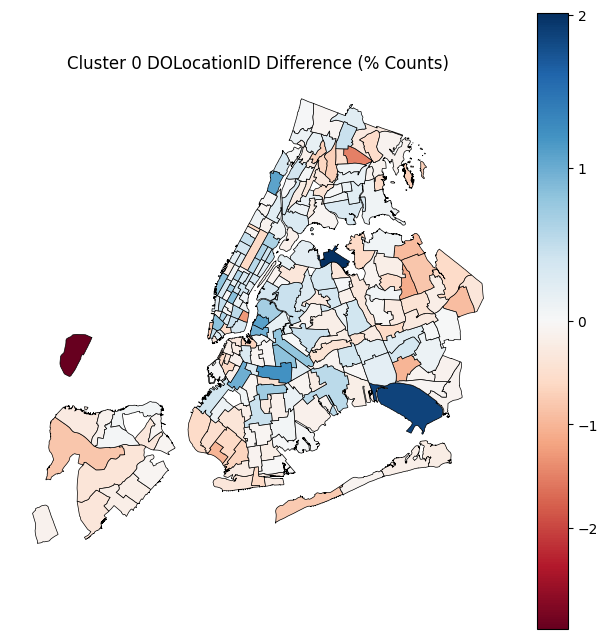

In [ ]:
# Crear la normalización: centro en 0
norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct_do"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct_do"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct_do',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 0 DOLocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

Cluster 1

In [375]:
cluster_1_counts['diff_pct'] = cluster_1_counts['Pct_Counts'] - pickup_total_counts['Pct_Counts']
pulocation_diff_pct = cluster_1_counts[['PULocationID','zone','diff_pct']].reset_index()

pulocation_diff_pct.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
pulocation_diff_pct.drop('index', axis=1, inplace=True)
pulocation_diff_pct.sort_values(by='diff_pct', ascending=False).head(10).reset_index(drop=True)

LocationID                       zone  diff_pct
0          61        Crown Heights North      1.19
1         249               West Village      0.97
2         256  Williamsburg (South Side)      0.97
3          76              East New York      0.92
4         234                   Union Sq      0.91
5         246  West Chelsea/Hudson Yards      0.87
6         231       TriBeCa/Civic Center      0.85
7         244   Washington Heights South      0.82
8         230  Times Sq/Theatre District      0.79
9         237      Upper East Side South      0.77

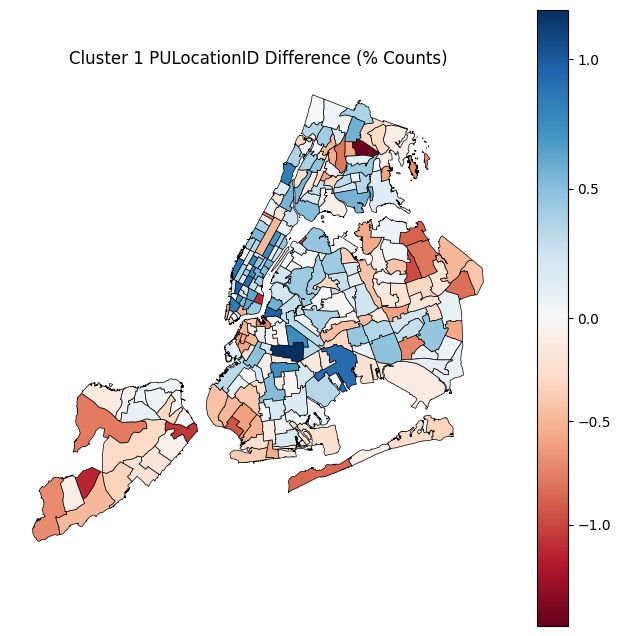

In [376]:
base_map_with_counts = base_map.merge(pulocation_diff_pct, on='LocationID', how='left')

# Crear la normalización: centro en 0
norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 1 PULocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

In [377]:
cluster_1_do_counts['diff_pct_do'] = cluster_1_do_counts['Pct_Counts'] - dropoff_total_counts['Pct_Counts']
dolocation_diff_pct = cluster_1_do_counts[['DOLocationID','zone','diff_pct_do']].reset_index()

dolocation_diff_pct.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
dolocation_diff_pct.drop('index', axis=1, inplace=True)
dolocation_diff_pct.sort_values(by='diff_pct_do', ascending=False).head(10).reset_index(drop=True)

LocationID                       zone  diff_pct_do
0         265                        NaN         1.39
1         246  West Chelsea/Hudson Yards         1.00
2          61        Crown Heights North         0.98
3          76              East New York         0.93
4         234                   Union Sq         0.93
5         231       TriBeCa/Civic Center         0.87
6         170                Murray Hill         0.85
7         244   Washington Heights South         0.84
8         181                 Park Slope         0.81
9         249               West Village         0.80

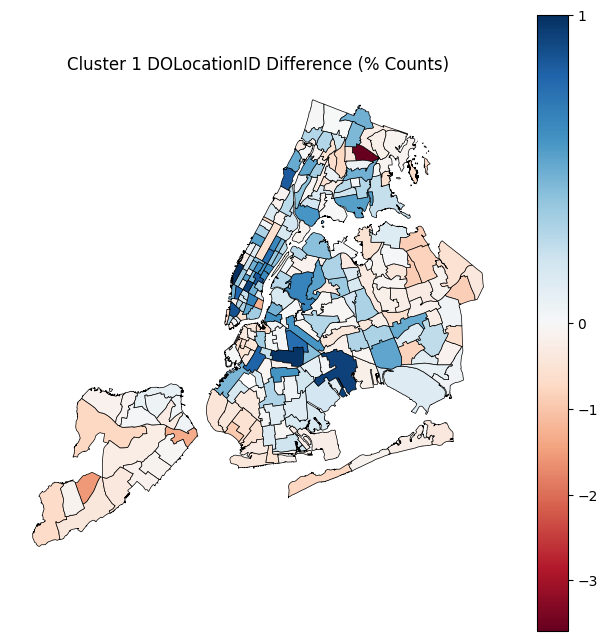

In [378]:
base_map_with_counts = base_map.merge(dolocation_diff_pct, on='LocationID', how='left')

# Crear la normalización: centro en 0
norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct_do"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct_do"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct_do',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 1 DOLocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

Cluster 2

In [379]:
cluster_2_counts['diff_pct'] = cluster_2_counts['Pct_Counts'] - pickup_total_counts['Pct_Counts']
pulocation_diff_pct = cluster_2_counts[['PULocationID','zone','diff_pct']].reset_index()

pulocation_diff_pct.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
pulocation_diff_pct.drop('index', axis=1, inplace=True)
pulocation_diff_pct.sort_values(by='diff_pct', ascending=False).head(10).reset_index(drop=True)

LocationID                          zone  diff_pct
0         132                   JFK Airport      6.48
1         138             LaGuardia Airport      2.87
2         230     Times Sq/Theatre District      1.51
3         181                    Park Slope      1.42
4         225            Stuyvesant Heights      1.34
5         237         Upper East Side South      1.08
6         162                  Midtown East      1.07
7          89          Flatbush/Ditmas Park      1.00
8         186  Penn Station/Madison Sq West      0.99
9         236         Upper East Side North      0.94

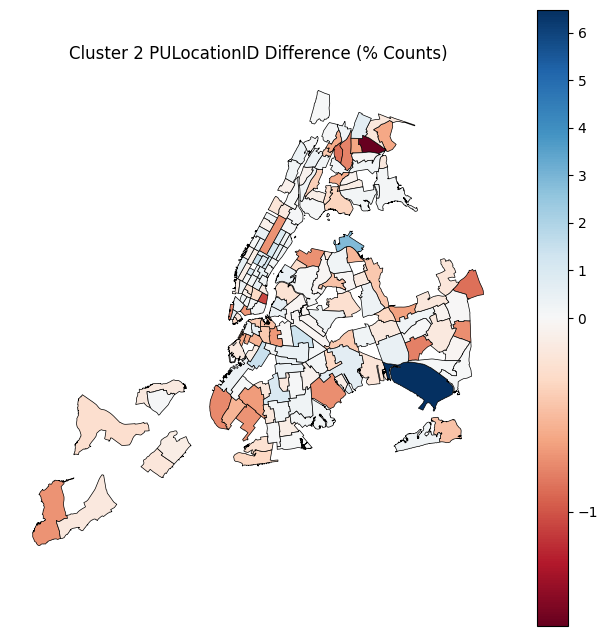

In [380]:
base_map_with_counts = base_map.merge(pulocation_diff_pct, on='LocationID', how='left')

# Crear la normalización: centro en 0
norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 2 PULocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

In [381]:
cluster_2_do_counts['diff_pct_do'] = cluster_2_do_counts['Pct_Counts'] - dropoff_total_counts['Pct_Counts']
dolocation_diff_pct = cluster_2_do_counts[['DOLocationID','zone','diff_pct_do']].reset_index()

dolocation_diff_pct.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
dolocation_diff_pct.drop('index', axis=1, inplace=True)
dolocation_diff_pct.sort_values(by='diff_pct_do', ascending=False).head(10).reset_index(drop=True)

LocationID                          zone  diff_pct_do
0         265                           NaN        21.52
1         132                   JFK Airport         7.86
2         140               Lenox Hill East         0.73
3         138             LaGuardia Airport         0.72
4         244      Washington Heights South         0.67
5         231          TriBeCa/Civic Center         0.65
6         186  Penn Station/Madison Sq West         0.55
7         170                   Murray Hill         0.52
8         225            Stuyvesant Heights         0.50
9         143           Lincoln Square West         0.44

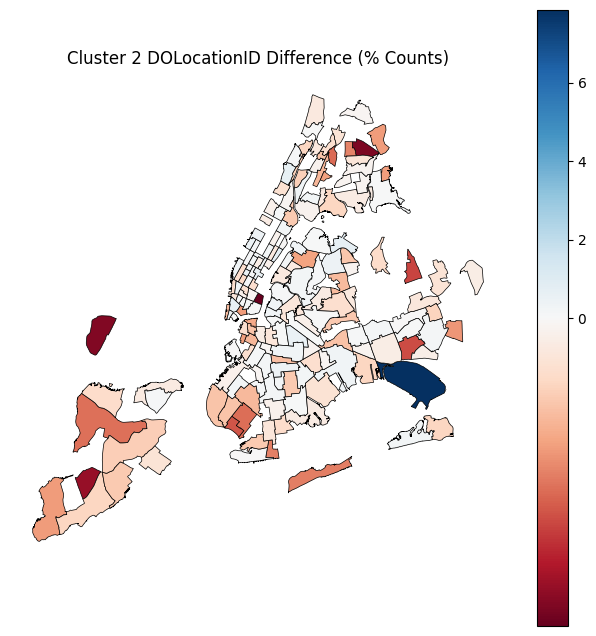

In [382]:
base_map_with_counts = base_map.merge(dolocation_diff_pct, on='LocationID', how='left')

# Crear la normalización: centro en 0
norm = TwoSlopeNorm(
    vmin=base_map_with_counts["diff_pct_do"].min(),
    vcenter=0,
    vmax=base_map_with_counts["diff_pct_do"].max()
)

# Plot con normalización centrada
fig, ax = plt.subplots(figsize=(8, 8))
base_map_with_counts.plot(
    column='diff_pct_do',
    cmap='RdBu',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    norm=norm
)

# Título y estética
plt.title("Cluster 2 DOLocationID Difference (% Counts)")
ax.set_axis_off()
plt.show()

Diferencias de Total Counts por Borough

In [401]:
# cluster_0_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).reset_index().sort_values(by='Counts', ascending=False)
df_counts_pu = df[['PULocationID', 'PUBorough']].groupby(['PULocationID', 'PUBorough']).size().reset_index(name='Counts')

In [ ]:
df_counts_pu['Pct_Counts'] = (round(df_counts_pu['Counts'] / df_counts_pu['Counts'].sum(),4)) * 100
df_counts_pu_boroughs = df_counts_pu.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()

In [409]:
cluster_1_boroughs = cluster_1_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_1_boroughs['diff_counts'] = cluster_1_boroughs['Pct_Counts'] - df_counts_pu_boroughs['Pct_Counts']

In [411]:
cluster_0_boroughs = cluster_0_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_0_boroughs['diff_counts'] = cluster_0_boroughs['Pct_Counts'] - df_counts_pu_boroughs['Pct_Counts']

In [413]:
cluster_2_boroughs = cluster_2_counts.groupby('PUBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_2_boroughs['diff_counts'] = cluster_2_boroughs['Pct_Counts'] - df_counts_pu_boroughs['Pct_Counts']

In [416]:
# Merge the diff_counts columns from cluster_0_boroughs, cluster_1_boroughs, and cluster_2_boroughs
diff_counts_df = cluster_0_boroughs[['PUBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 0'}).merge(
    cluster_1_boroughs[['PUBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 1'}),
    on='PUBorough',
    how='outer'
).merge(
    cluster_2_boroughs[['PUBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 2'}),
    on='PUBorough',
    how='outer'
)

diff_counts_df

PUBorough  Cluster 0  Cluster 1  Cluster 2
0          Bronx      -2.09       1.16      -3.37
1       Brooklyn       0.05      -0.72       0.49
2      Manhattan       1.16      -1.10      -2.63
3    Out of City      -0.01      -0.01       0.10
4         Queens       1.36       0.53       4.45
5  Staten Island      -0.44       0.12       0.63

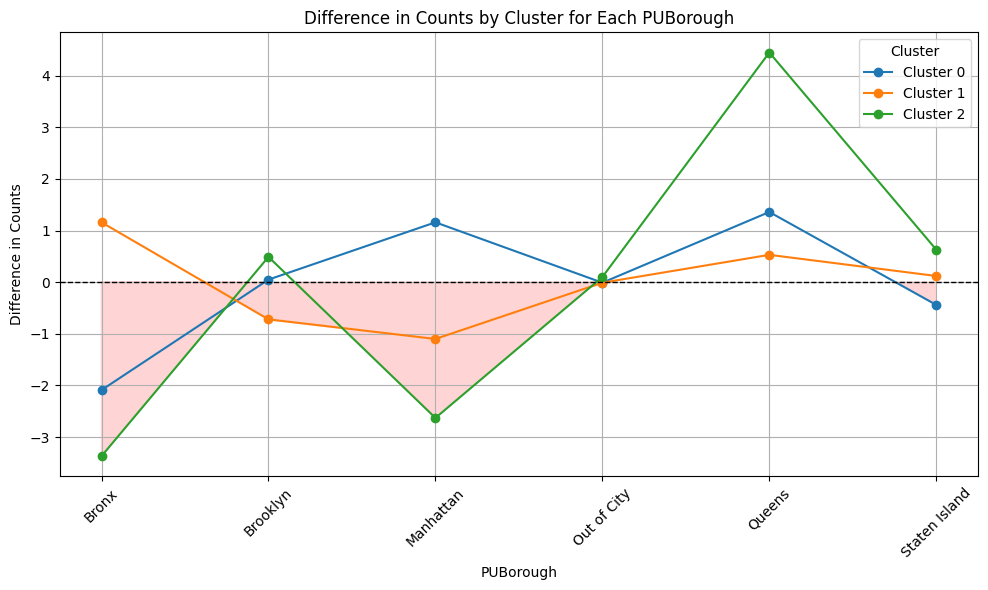

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        diff_counts_df['PUBorough'],
        diff_counts_df[cluster],
        marker='o',
        label=cluster
    )

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Fill the area below zero
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.fill_between(
        diff_counts_df['PUBorough'],
        diff_counts_df[cluster],
        0,
        where=(diff_counts_df[cluster] < 0),
        color='#ffd4d4',
        interpolate=True
    )

# Add labels, title, and legend
plt.title('Difference in Counts by Cluster for Each PUBorough')
plt.xlabel('PUBorough')
plt.ylabel('Difference in Counts')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [421]:
df_counts_do = df[['DOLocationID', 'DOBorough']].groupby(['DOLocationID', 'DOBorough']).size().reset_index(name='Counts')

df_counts_do['Pct_Counts'] = (round(df_counts_do['Counts'] / df_counts_do['Counts'].sum(),4)) * 100
df_counts_do_boroughs = df_counts_do.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()

In [433]:
cluster_0_boroughs_do = cluster_0_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_0_boroughs_do['diff_counts'] = cluster_0_boroughs_do['Pct_Counts'] - df_counts_do_boroughs['Pct_Counts']

In [435]:
cluster_1_boroughs_do = cluster_1_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_1_boroughs_do['diff_counts'] = cluster_1_boroughs_do['Pct_Counts'] - df_counts_do_boroughs['Pct_Counts']

In [437]:
cluster_2_boroughs_do = cluster_2_do_counts.groupby('DOBorough').agg({'Counts': 'sum', 'Pct_Counts': 'sum'}).sort_values(by='Counts', ascending=False).reset_index()
cluster_2_boroughs_do['diff_counts'] = cluster_2_boroughs_do['Pct_Counts'] - df_counts_do_boroughs['Pct_Counts']

In [440]:
# Merge the diff_counts columns from cluster_0_boroughs, cluster_1_boroughs, and cluster_2_boroughs
diff_counts_do_df = cluster_0_boroughs_do[['DOBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 0'}).merge(
    cluster_1_boroughs_do[['DOBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 1'}),
    on='DOBorough',
    how='outer'
).merge(
    cluster_2_boroughs_do[['DOBorough', 'diff_counts']].rename(columns={'diff_counts': 'Cluster 2'}),
    on='DOBorough',
    how='outer'
)

diff_counts_do_df

DOBorough  Cluster 0  Cluster 1  Cluster 2
0          Bronx      -2.05       1.51       2.64
1       Brooklyn       0.32      -0.18      -4.93
2            EWR       0.37        NaN       1.12
3      Manhattan      -0.88       0.98     -10.99
4    Out of City       0.63       0.13       2.69
5         Queens       2.05       0.29       8.32
6  Staten Island      -0.44      -2.35       1.35

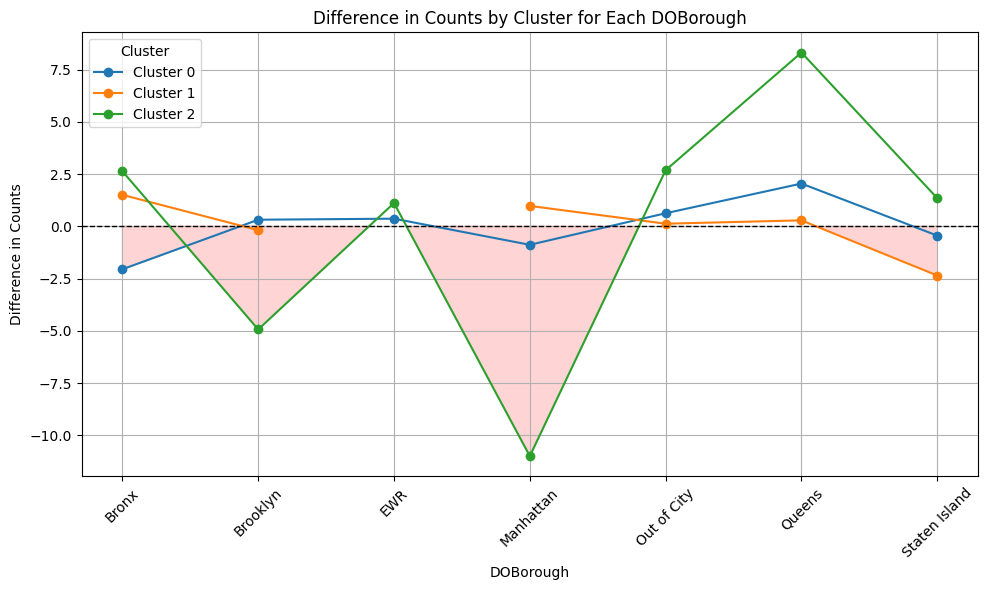

In [441]:
# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        diff_counts_do_df['DOBorough'],
        diff_counts_do_df[cluster],
        marker='o',
        label=cluster
    )

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Fill the area below zero
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.fill_between(
        diff_counts_do_df['DOBorough'],
        diff_counts_do_df[cluster],
        0,
        where=(diff_counts_do_df[cluster] < 0),
        color='#ffd4d4',
        interpolate=True
    )

# Add labels, title, and legend
plt.title('Difference in Counts by Cluster for Each DOBorough')
plt.xlabel('DOBorough')
plt.ylabel('Difference in Counts')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparación entre variables numéricas
- Comparar distribuciones